In [6]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates


from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [7]:
from pandas.tseries.offsets import MonthEnd # 月末
Market_ret = pd.read_csv("D:\class1\Marketret_mon_stock2024.csv")
Market_ret['month'] = pd.to_datetime(Market_ret['month'], format='%b %Y') + MonthEnd(0)
Market_ret.set_index('month', inplace=True)
Market_ret.sort_index(inplace=True)
Market_ret = Market_ret.drop(columns=['Unnamed: 0'])
Market_ret

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sa'si'gei\AppData\Local\Temp\ipykernel_18420\1601534071.py:2: SyntaxWarning: invalid escape sequence '\c'
  Market_ret = pd.read_csv("D:\class1\Marketret_mon_stock2024.csv")


,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q
month,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2
...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4


In [8]:
inflation = pd.read_csv("D:\class1\inflation.csv")
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sa'si'gei\AppData\Local\Temp\ipykernel_18420\2210025466.py:1: SyntaxWarning: invalid escape sequence '\c'
  inflation = pd.read_csv("D:\class1\inflation.csv")


,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2025-03-31,-0.1
2025-04-30,-0.1
2025-05-31,-0.1


In [9]:
reg_data = pd.merge(Market_ret, inflation, left_index=True, right_index=True,how='left')
reg_data

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi
month,,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1,2.2
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1,1.0
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1,1.6
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2,1.3
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2,3.6
...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3


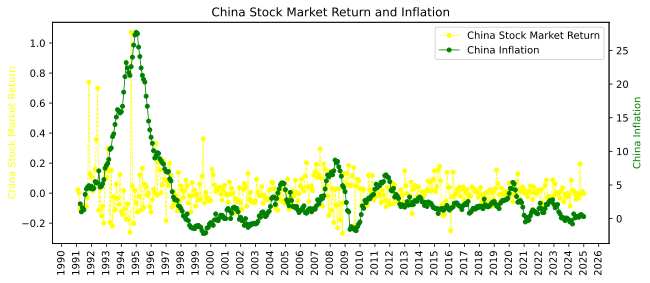

In [16]:

# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(10,4))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data['ret'],color='yellow',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='--',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='yellow')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(reg_data['cpi'].shift(2),color='green',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Inflation')

ax2.set_ylabel('China Inflation',color='green')

plt.title('China Stock Market Return and Inflation')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# save figure
fig.savefig('China_Stock_Market_Return_and_Inflation.png', dpi=1000, bbox_inches='tight')

plt.show();

In [12]:
# 主要变量（ret, cpi）的描述性统计
reg_data[['ret','cpi']].describe().round(5)

,ret,cpi
count,408.00000,408.00000
mean,0.01094,3.67809
std,0.11526,5.41285
min,-0.26835,-2.20000
25%,-0.04960,0.90000
50%,0.00278,2.04200
75%,0.04832,4.46350
max,1.07139,27.70000


In [13]:
reg_data['ret'].skew()
reg_data['ret'].kurt()

3.150119130124935

23.739083290885276

In [14]:
from statsmodels.tsa.stattools import adfuller as ADF

# 对月收益率数据进行ADF检验
adf_result = ADF(reg_data['ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')

原始序列的ADF检验结果:
ADF Statistic: -6.0891
p-value: 0.0000
Critical Values:
   1%: -3.4469
   5%: -2.8688
   10%: -2.5707
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [15]:
adf_result = ADF(reg_data['2000':]['cpi'])
print('\n原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')

if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')


原始序列的ADF检验结果:
ADF Statistic: -3.3288
p-value: 0.0136
Critical Values:
   1%: -3.4535
   5%: -2.8717
   10%: -2.5722
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [17]:
# Regression of return on inflation
reg_data['lcpi'] = reg_data['cpi'].shift(2)/100
model_cpi = smf.ols('ret ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.293
Date:                 周二, 14 10月 2025   Prob (F-statistic):            0.00732
Time:                        21:17:54   Log-Likelihood:                 354.12
No. Observations:                 300   AIC:                            -704.2
Df Residuals:                     298   BIC:                            -696.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0213      0.007      2.874      0.0

In [18]:
reg_data['lret'] = reg_data['ret'].shift(1)
model_cpi_lag = smf.ols('ret ~ lcpi + lret',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.770
Date:                 周二, 14 10月 2025   Prob (F-statistic):           0.000514
Time:                        21:18:15   Log-Likelihood:                 356.06
No. Observations:                 300   AIC:                            -706.1
Df Residuals:                     297   BIC:                            -695.0
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0191      0.007      2.860      0.0

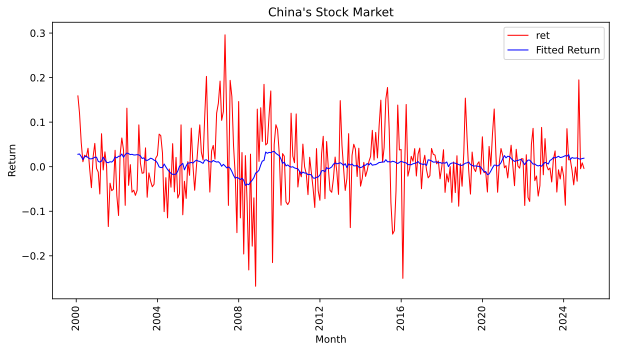

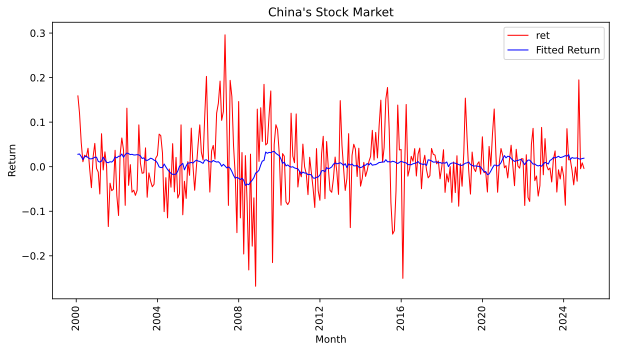

In [20]:
data = reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)
plt.legend()
fig.savefig('China_Stock_Market_Return_and_Inflation.png', dpi=1000, bbox_inches='tight')  # 更改输出图片格式 jpg
plt.show();

In [21]:
Q_reg_data = reg_data['1995-01':'2024-12'].resample('QE').apply({
    'ret':
    lambda x: (1 + x).prod() - 1,
    'cpi':
    lambda x: sum(x)
})
Q_reg_data['lag_cpi'] = Q_reg_data['cpi'].shift(1)
Q_reg_data

,ret,cpi,lag_cpi
month,,,
1995-03-31,-0.040492,6.780000e+01,NaN
1995-06-30,-0.063176,5.920000e+01,6.780000e+01
1995-09-30,0.087428,4.440000e+01,5.920000e+01
1995-12-31,-0.204470,3.340000e+01,4.440000e+01
1996-03-31,-0.022218,2.810000e+01,3.340000e+01
...,...,...,...
2023-12-31,-0.047820,-1.000000e+00,-2.000000e-01
2024-03-31,0.006789,-8.326673e-17,-1.000000e+00
2024-06-30,-0.034157,8.000000e-01,-8.326673e-17


In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

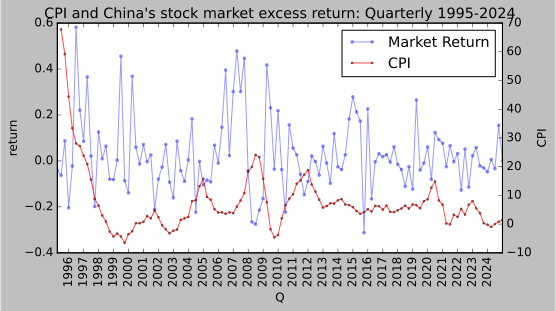

In [23]:
# Change the figure style
plt.style.use('classic')
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Q_reg_data['ret'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q')  # 设置横坐标标签
ax1.set_ylabel('return')  # 设置左边纵坐标标签
#ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("CPI and China's stock market excess return: Quarterly 1995-2024")  # 给整张图命名

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation = 90) # 转置x轴的日期显示格式

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Q_reg_data['lag_cpi'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='CPI')
ax2.set_ylabel('CPI')  # 设置右边纵坐标标签
#ax2.legend(loc=1)  # 设置图例在右上方

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.savefig('Qcpi.pdf', bbox_inches='tight')
plt.show();


In [24]:
Q_reg_data['lcpi'] = Q_reg_data['cpi'].shift(1)
model_qcpi = smf.ols('ret ~ lcpi',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     5.792
Date:                 周二, 14 10月 2025   Prob (F-statistic):             0.0180
Time:                        21:20:07   Log-Likelihood:                 49.342
No. Observations:                 100   AIC:                            -94.68
Df Residuals:                      98   BIC:                            -89.47
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0641      0.024      2.685      0.0

In [25]:
Q_reg_data['lret'] = Q_reg_data['ret'].shift(1)
model_qcpi_lag = smf.ols('ret ~ lcpi + lret',
                 data=Q_reg_data['2000':'2024']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_qcpi_lag.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4.479
Date:                 周二, 14 10月 2025   Prob (F-statistic):             0.0138
Time:                        21:20:22   Log-Likelihood:                 50.649
No. Observations:                 100   AIC:                            -95.30
Df Residuals:                      97   BIC:                            -87.48
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0558      0.021      2.665      0.0

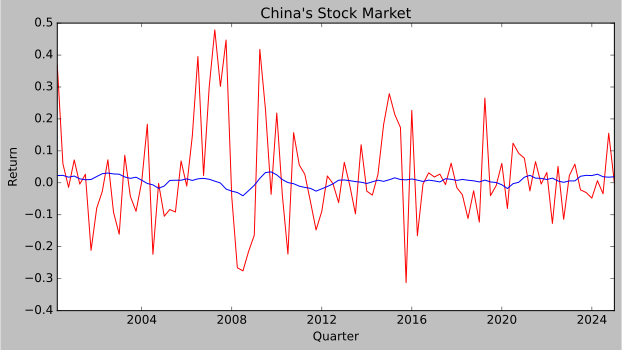

In [26]:
data = Q_reg_data['2000-01':'2024-12'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('ret',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Quarter')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

plt.show();

In [27]:
reg_data['next_ret'] = reg_data['ret'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['ret'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['ret'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,MarketR,MarketR_e,rfmonth,ret,ret_e,marketret3,marketret6,marketret12,Q,cpi,lcpi,lret,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,,,,,,,,
1991-01-31,0.029998,0.036554,0.006930,0.023068,0.029624,-0.084127,-0.305662,0.254049,1991 Q1,2.2,NaN,NaN,1.003273,0.893407,0.913697,-0.181025
1991-02-28,0.010203,0.021860,0.006930,0.003273,0.014930,-0.183573,-0.384745,0.241492,1991 Q1,1.0,NaN,0.023068,0.893407,0.913697,0.919387,-0.249501
1991-03-31,-0.099663,-0.060425,0.006930,-0.106593,-0.067355,-0.252928,-0.445049,0.288857,1991 Q1,1.6,0.022,0.003273,0.913697,0.919387,0.914560,-0.231732
1991-04-30,-0.079652,-0.031449,0.006651,-0.086303,-0.038100,-0.234776,-0.394937,0.691749,1991 Q2,1.3,0.010,-0.106593,0.919387,0.914560,0.911811,-0.233318
1991-05-31,-0.074521,0.005375,0.006092,-0.080613,-0.000717,-0.236294,0.181673,1.542701,1991 Q2,3.6,0.016,-0.086303,0.914560,0.911811,0.909723,-0.241377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,-0.031468,-0.033685,0.001118,-0.032586,-0.034803,0.151050,NaN,NaN,2024 Q3,0.6,0.002,-0.000624,1.194874,0.995473,1.008606,0.199701
2024-09-30,0.195992,0.227078,0.001118,0.194874,0.225960,0.200147,NaN,NaN,2024 Q3,0.4,0.005,-0.032586,0.995473,1.008606,0.996203,0.000228
2024-10-31,-0.003409,0.070220,0.001118,-0.004527,0.069102,0.000228,NaN,NaN,2024 Q4,0.3,0.006,0.194874,1.008606,0.996203,NaN,NaN


In [28]:
model_cpi_3month = smf.ols('marketret3 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                            OLS Regression Results                            
Dep. Variable:             marketret3   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     6.881
Date:                 周二, 14 10月 2025   Prob (F-statistic):            0.00916
Time:                        21:21:14   Log-Likelihood:                 143.68
No. Observations:                 298   AIC:                            -283.4
Df Residuals:                     296   BIC:                            -276.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0616      0.022      2.791      0.0

In [29]:
model_cpi_6month = smf.ols('marketret6 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_6month.summary())

                            OLS Regression Results                            
Dep. Variable:             marketret6   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     4.639
Date:                 周二, 14 10月 2025   Prob (F-statistic):             0.0321
Time:                        21:21:29   Log-Likelihood:                -26.606
No. Observations:                 295   AIC:                             57.21
Df Residuals:                     293   BIC:                             64.59
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1083      0.045      2.387      0.0

In [30]:
model_cpi_12month = smf.ols('marketret12 ~ lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(       
                        cov_type='HAC', cov_kwds={'maxlags': 6})    
print(model_cpi_12month.summary())

                            OLS Regression Results                            
Dep. Variable:            marketret12   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.008
Date:                 周二, 14 10月 2025   Prob (F-statistic):              0.158
Time:                        21:21:46   Log-Likelihood:                -214.97
No. Observations:                 289   AIC:                             433.9
Df Residuals:                     287   BIC:                             441.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1841      0.102      1.797      0.0

In [31]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_cpi, model_cpi_3month, model_cpi_6month, model_cpi_12month],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=["Next Month's Return", "Next 3 Months' Return", "Next 6 Months' Return", "Next 12 Months' Return"],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Stock Market Return')

print(results_table)

                         Table - OLS Regressions: Forecast Stock Market Return
                 Next Month's Return Next 3 Months' Return Next 6 Months' Return Next 12 Months' Return
-------------------------------------------------------------------------------------------------------
Intercept        0.021***            0.062***              0.108**               0.184*                
                 (0.007)             (0.022)               (0.045)               (0.102)               
lcpi             -0.727***           -1.994***             -3.016**              -3.556                
                 (0.269)             (0.760)               (1.400)               (2.510)               
R-squared        0.034               0.062                 0.046                 0.018                 
R-squared Adj.   0.031               0.059                 0.043                 0.014                 
No. observations 300                 298                   295                   289     

In [32]:
reg_data['lcpi'] = reg_data['cpi'].shift(1)
model_cpiself = smf.ols('cpi~lcpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1489.
Date:                 周二, 14 10月 2025   Prob (F-statistic):          6.43e-118
Time:                        21:22:23   Log-Likelihood:                -263.10
No. Observations:                 300   AIC:                             530.2
Df Residuals:                     298   BIC:                             537.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1031      0.048      2.169      0.0

In [33]:
model_cpiself = smf.ols('ret~cpi',
                 data=reg_data['2000-01':'2024-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpiself.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.704
Date:                 周二, 14 10月 2025   Prob (F-statistic):              0.101
Time:                        21:25:37   Log-Likelihood:                 351.62
No. Observations:                 300   AIC:                            -699.2
Df Residuals:                     298   BIC:                            -691.8
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0174      0.008      2.304      0.0